# IAM - Avaliação 01
**Disciplina:** Introdução ao Aprendizado de Máquina (ENGG67)  
**Professor:** Antônio C. L. Fernandes Jr.  
**Aluno(s):** Giovane Santos de Santana, Heverton Silva dos Reis  
**Data de Entrega:** 22/04/2025

---

### Conjunto de Dados: Breast Cancer Wisconsin (Diagnostic)
[Link para o dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

---



In [ ]:
pip install ucimlrepo

In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Antes de começar a análise, é preciso carregar o dataset, através de importação direta, como indicado pela documentação do repositório:

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
df = breast_cancer_wisconsin_diagnostic.data.features
dt = breast_cancer_wisconsin_diagnostic.data.targets

Em seguida, realiza-se a importação das bibliotecas que serão utilizadas ao longo da análise:

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### a) O conjunto de dados é univariado ou multivariado? Descreva a quantidade de atributos preditivos e atributos alvo.

Para avaliar se o conjunto de dados em análise são **univariados** ou **multivariados** é preciso expandir suas variáveis:

In [ ]:
# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

Através dessa expansão, percebe-se que o conjunto de dados é **multivariado**, pois entre suas variáveis verificou-se a ocorrência de até **30 atributos preditivos** (identificados no dataset com o papel de `Feature`). Dentre os outros atributos, o atributo que possuiu o papel de **alvo** (`Target`) é o atributo **Diagnosis**.

### b)  Caracterize os dados quanto ao Tipo e Escala.

Para definir o **Tipo** e **Escala** dos dados, pode-se começar verificando os tipos dos **atributos preditivos** através do comando *dtypes* da biblioteca *Pandas*:

In [ ]:
# Ver os tipos de dados diretamente do DataFrame
df.dtypes

,0
radius1,float64
texture1,float64
perimeter1,float64
area1,float64
smoothness1,float64
compactness1,float64
concavity1,float64
concave_points1,float64
symmetry1,float64
fractal_dimension1,float64


Logo, é possível concluir que os **atributos preditivos** são do tipo **numérico contínuo**.

Já para o **atributo alvo**, optou-se por plotar as primeiras linhas do DataFrame através do comando `head()`, que revelou que esse atributo é do tipo **categórico**.

In [ ]:
# Ver os dados das primeiras linhas do DataFrame
dt.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


Quanto a escala, para o atributo alvo, é imedato perceber que se tratam de valores **nominais**. Já para os atributos preditivos, é preciso prestar atenção ao contexto e perceber que eles fazem alusão a atributos geométricos como área, perímetro, concavidade, simetria, entre outros. Ou seja, esses atributos carregam significado absoluto, portanto tais atributos são da escala **racional**.

### c) Verifique a necessidade de balanceamento dos dados e caracterize estatisticamente os dados (calcule, para cada atributo, suas estatísticas univariadas pertinentes dentre frequência, moda, média, mediana, desvio-padrão, Q1, Q3, obliquidade e curtose).

Para verificar se o conjunto precisa de um balancemanto, pode-se começar analisando a distribuição das classes de `Diagnosis`, o **atributo alvo**.

In [ ]:
# Ver distribuição das classes do diagnóstico
dt['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


Tem-se que existem **357 amostras** da classe **B (Benigno)** e **212 amostras** da classe **M (Maligino)**, num **total de 569 amostras**. Ao verificar a proporção das amostras, observou-se que:
<br>
<br>
<br>
$Classe B = \frac{357}{569} \times 100 = 62.7 \%$ e $Classe A = \frac{212}{569} \times 100 = 37.3 \%$

In [ ]:
# Selecionar apenas os atributos preditivos

# Estatísticas básicas
descricao = pd.DataFrame()
descricao['Média'] = df.mean()
descricao['Mediana'] = df.median()
descricao['Moda'] = df.mode().iloc[0]
descricao['Desvio Padrão'] = df.std()
descricao['Q1 (25%)'] = df.quantile(0.25)
descricao['Q3 (75%)'] = df.quantile(0.75)
descricao['Obliquidade'] = df.skew()
descricao['Curtose'] = df.kurt()

# Exibir as variáveis
descricao.head(30)

,Média,Mediana,Moda,Desvio Padrão,Q1 (25%),Q3 (75%),Obliquidade,Curtose
radius1,14.127292,13.370000,12.340000,3.524049,11.700000,15.780000,0.942380,0.845522
texture1,19.289649,18.840000,14.930000,4.301036,16.170000,21.800000,0.650450,0.758319
perimeter1,91.969033,86.240000,82.610000,24.298981,75.170000,104.100000,0.990650,0.972214
area1,654.889104,551.100000,512.200000,351.914129,420.300000,782.700000,1.645732,3.652303
smoothness1,0.096360,0.095870,0.100700,0.014064,0.086370,0.105300,0.456324,0.855975
compactness1,0.104341,0.092630,0.114700,0.052813,0.064920,0.130400,1.190123,1.650130
concavity1,0.088799,0.061540,0.000000,0.079720,0.029560,0.130700,1.401180,1.998638
concave_points1,0.048919,0.033500,0.000000,0.038803,0.020310,0.074000,1.171180,1.066556
symmetry1,0.181162,0.179200,0.160100,0.027414,0.161900,0.195700,0.725609,1.287933
fractal_dimension1,0.062798,0.061540,0.056670,0.007060,0.057700,0.066120,1.304489,3.005892


### d) Analise os dados quanto à sua incompletude, inconsistências, redundâncias e presença de ruído

Uma estatégia que pode ser utilizada para avaliar o conjunto de dados quanto à sua **incompletude** é verificar a existência de **valores nulos** entre os atributos. Isso pode ser feito atraves do comando `isnull()` do pandas. Ao se fazer um **somatório desses valores**, se o valor for 0 para cada uma das colunas, então **não existe incompletude** para esses atributos. Começa-se com os atributos preditivos:


In [ ]:
# Verificar valores nulos em cada coluna
df.isnull().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


O mesmo pode ser feito para o atributo alvo:

In [ ]:
# Verificar valores nulos em cada coluna
dt.isnull().sum()

,0
Diagnosis,0


Assim, pode-se concluir que não existem incompletudes entre os valores do dataset.

Já para verificar o conjunto em relação às **incosistências**, pode-se partir da análise já realizada anteriormente sobre os **Tipo** e a **Escala** dos dados. Como visto, os atributos preditivos representam valores **numéricos contínuos e absolutos**, mais especificamente, tratam de **medidas físicas** as quais **não se aplicam valores negativos** (a exemplo de área, raio, concavidade, etc.). Logo, assim como na abordagem anterior, pode-se verificar a existência desses valores e calcular seu somatório. Novamente, busca-se que o valor seja 0, para que não hajam incosistências:

In [ ]:
# Verificar valores negativos dos atributos preditivos
(df < 0).sum()


,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


Então, tem-se que os valores dos atributos preditivos são consistentes.

Quanto a redundânicia, uma forma de avaliar isso é possível aplicar uma **matriz de correlação**, e verificar os atributos que possuem uma correlação **próxima de 1**. Essa característica estatística pode indicar atributos que trazem informações semelhantes, e, que um deles poderia ser removido, a depender da análise.

In [ ]:
# Matriz de correlação
cor = df.corr().abs()

# Verificar redundância: pares com correlação alta (> 0.9)
redundantes = cor.where((cor > 0.9) & (cor < 1.0))
redundantes.dropna(how='all', axis=0).dropna(how='all', axis=1)

,radius1,texture1,perimeter1,area1,concavity1,concave_points1,radius2,perimeter2,area2,radius3,texture3,perimeter3,area3,concave_points3
radius1,NaN,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,0.969539,NaN,0.965137,0.941082,NaN
texture1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912045,NaN,NaN,NaN
perimeter1,0.997855,NaN,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,0.969476,NaN,0.970387,0.941550,NaN
area1,0.987357,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,0.962746,NaN,0.959120,0.959213,NaN
concavity1,NaN,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave_points1,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910155
radius2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972794,0.951830,NaN,NaN,NaN,NaN,NaN
perimeter2,NaN,NaN,NaN,NaN,NaN,NaN,0.972794,NaN,0.937655,NaN,NaN,NaN,NaN,NaN
area2,NaN,NaN,NaN,NaN,NaN,NaN,0.951830,0.937655,NaN,NaN,NaN,NaN,NaN,NaN
radius3,0.969539,NaN,0.969476,0.962746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993708,0.984015,NaN


Ao fazer isso com os atributos preditivos, como esperado, verificou-se que existem correlações altas entre atributos físicos, como **área, perímetro e raio**, por exemplo. Logo, alguns desses valores poderiam ser desprezados na análise de alguns modelos, como os de regressão linear por exemplo.

### e) Calcule estatísticas multivariadas de covariância e correlação para os atributos quantitativos presentes. Interprete os valores obtidos.

In [22]:
# Calcular matriz de covariância
matriz_cov = df.cov()
matriz_cov.round(2)  # Visualizar parte da matriz

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,12.42,4.91,85.45,1224.48,0.01,0.09,0.19,0.11,0.01,-0.01,...,16.51,6.43,114.29,1888.23,0.01,0.23,0.39,0.17,0.04,0.00
texture1,4.91,18.50,34.44,485.99,-0.00,0.05,0.10,0.05,0.01,-0.00,...,7.33,24.11,51.75,841.28,0.01,0.19,0.27,0.08,0.03,0.01
perimeter1,85.45,34.44,590.44,8435.77,0.07,0.71,1.39,0.80,0.12,-0.04,...,113.86,45.26,792.33,13026.15,0.08,1.74,2.86,1.23,0.28,0.02
area1,1224.48,485.99,8435.77,123843.55,0.88,9.26,19.24,11.24,1.46,-0.70,...,1637.52,621.82,11341.79,192192.56,0.99,21.62,37.63,16.70,3.13,0.02
smoothness1,0.01,-0.00,0.07,0.88,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.11,1.66,0.00,0.00,0.00,0.00,0.00,0.00
compactness1,0.09,0.05,0.71,9.26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.14,0.08,1.05,15.32,0.00,0.01,0.01,0.00,0.00,0.00
concavity1,0.19,0.10,1.39,19.24,0.00,0.00,0.01,0.00,0.00,0.00,...,0.27,0.15,1.95,30.68,0.00,0.01,0.01,0.00,0.00,0.00
concave_points1,0.11,0.05,0.80,11.24,0.00,0.00,0.00,0.00,0.00,0.00,...,0.16,0.07,1.12,17.89,0.00,0.00,0.01,0.00,0.00,0.00
symmetry1,0.01,0.01,0.12,1.46,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.02,0.20,2.77,0.00,0.00,0.00,0.00,0.00,0.00
fractal_dimension1,-0.01,-0.00,-0.04,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.01,-0.00,-0.05,-0.93,0.00,0.00,0.00,0.00,0.00,0.00


In [24]:
# Calcular matriz de correlação
matriz_cor = df.corr()
matriz_cor.round(2)  # Visualizar parte da matriz

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture1,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter1,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area1,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness1,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness1,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity1,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave_points1,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry1,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
fractal_dimension1,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


Como é possível perceber, como os dados são volumosos, fica difícil obter respostas através dessas duas medidas estatíticas apenas visualizando os resultados brutos das operações de **covariância** e **correlação**. Assim, faz-se necessária uma abordagem gráfica. Uma opção é utilizar os valores da matriz de correlação (a normalização da covariância) para gerar um **mapa de calor**:

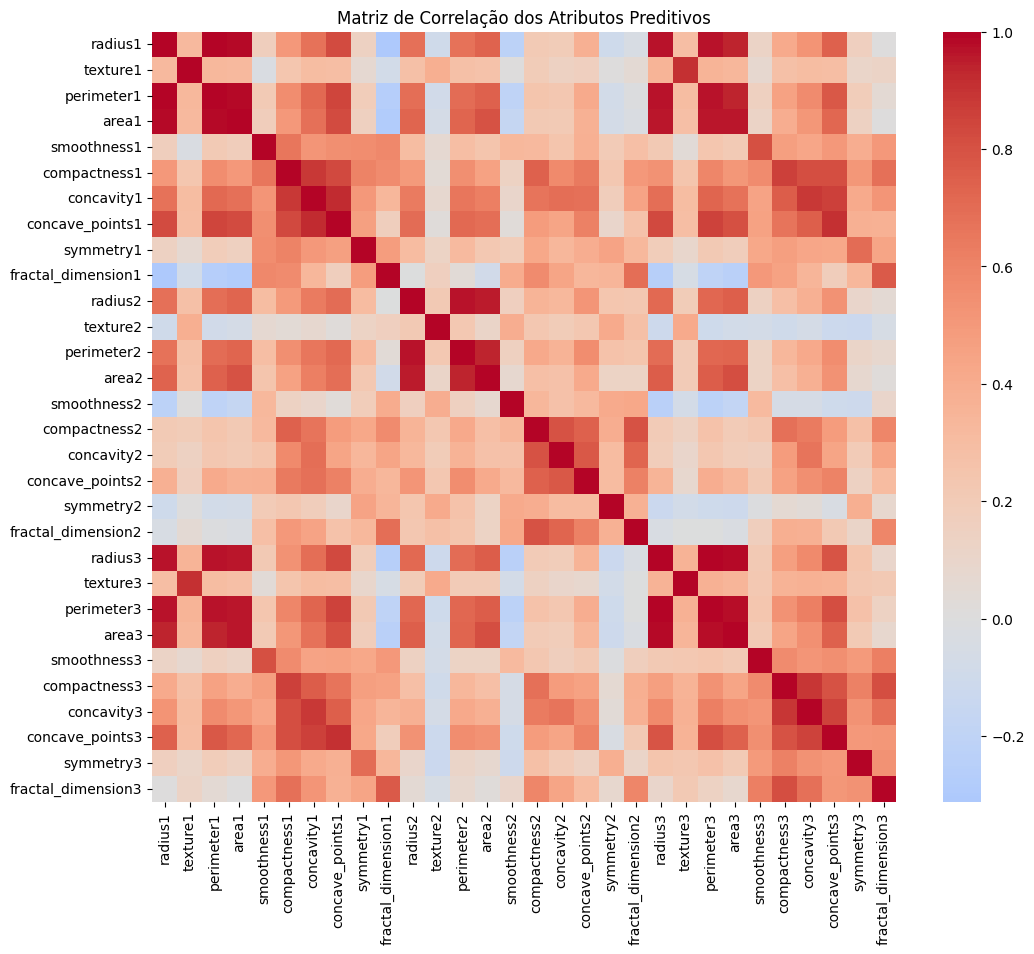

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(matriz_cor, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de Correlação dos Atributos Preditivos")
plt.show()

Como já foi percebido anteriormente nesta análise, os valores de dimensões físicas como **área, perimêtro e raio** possuem alta correlação entre si, o que é esperado, visto que qualquer mudança em uma dessas medidas afeta as outras. Logo, a depender da análise, alguns desses parâmetros poderiam ser removidos. Já outros como **suavidade, simetria e dimensão fractal** possuem menos correlação com os atributos físicos, mas mais, umas com as outras, o que indica que talvez possam ser avaliadas em separado.

### h) Promova uma transformação de dados consistente com o banco sob análise

Como foi possível perceber pela plotagem dos gráficos anteriores, os **atributos físicos (área, perimetro, etc.)** apresentam alta incidência de *outliers*. Assim, pode-se aplicar uma técnica de **normalização por amplitude**, a **padronização**:

In [11]:
# Seleciona os atributos preditivos (ignorando ID e Diagnosis)
X = df

# Aplica a padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converte o resultado para DataFrame com os mesmos nomes de colunas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Exibe os primeiros valores transformados
X_scaled_df.head()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


A padronização dos atributos preditivos foi aplicada utilizando `StandardScaler`, que transforma os dados para que tenham média zero e desvio padrão igual a um.

Essa transformação faz sentido para o conjunto de dados Breast Cancer Wisconsin Diagnostic por três motivos principais:

1. **Atributos com escalas muito diferentes** — características como `area1` e `smoothness1` têm ordens de grandeza distintas. Sem padronização, algoritmos sensíveis à escala poderiam atribuir mais importância a atributos com valores numericamente maiores, mesmo que não sejam mais relevantes.

2. **Preservação da distribuição** — a padronização mantém a forma da distribuição dos dados (incluindo outliers e assimetrias), permitindo análise posterior sem distorção estatística.

3. **Pré-requisito para técnicas como PCA** — que se baseiam em variância, a padronização garante que nenhum atributo domine artificialmente a análise de componentes principais.

Portanto, a padronização contribui para uma análise mais justa e confiável.


### i) Utilize a análise de componentes principais (PCA) para gerar gráficos no espaço de atributos

O **PCA (Principal Components Analysis)** transforma os dados em um novo sistema de coordenadas, onde: o primeiro componente explica a maior variância possível; o segundo componente explica a maior variância restante (e assim por diante); os novos "atributos" (componentes principais) são combinações lineares dos atributos originais

In [15]:
# Aplica PCA nos dados já padronizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Converte para DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca["Diagnosis"] = dt["Diagnosis"].values # Reanexa as classes

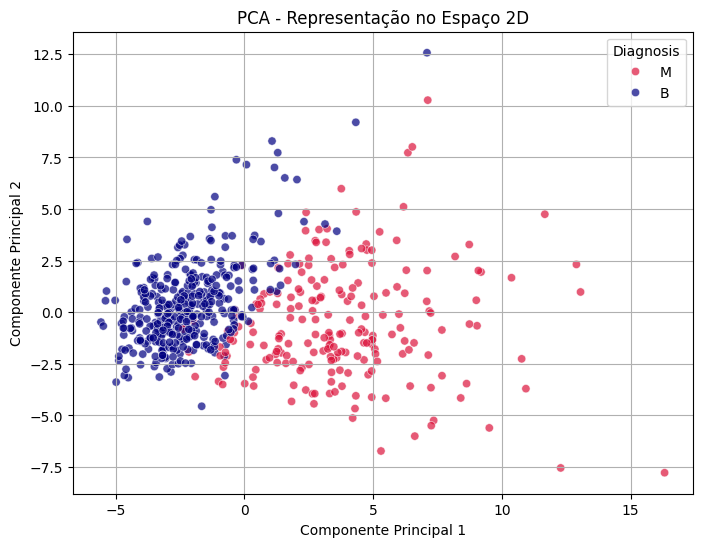

In [16]:
# Plotagem dos dois primeiros componentes principais
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Diagnosis",
    data=df_pca, palette=["crimson", "navy"], alpha=0.7
)
plt.title("PCA - Representação no Espaço 2D")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()